# <center> Topics of Python Programming Project - Final Project</center>
# <center> Group 8 - Akshay Jadhav</center>
# <center> Bank Customer Churn Prediction</center>

## Introduction

Banking is one of those traditional industries that has gone through a steady transformation over the decades. 
Yet, many banks today with a large customer base hoping to gain a competitive edge have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems - customer churn.

In general, customer churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. 

Moreover, it is much more expensive to sign in a new customer than keeping an existing one.

It is advantageous for banks to know what leads a customer towards the decision to leave the bank in term of closing the accounts, in terms of withdrawing the amounts from accounts.

Churn prevention allows banks to develop loyalty programs and retention campaigns to keep as many customers as possible.

In this example, we use sample customer data from a bank to construct a predictive model for the likely churn customers.

## Business Problem Statement

There are a lot of customers who have decided to end their relationship with the bank. It could happen due to variety of reasons as below:

-	Bad Customer Service
-	Bad Onboarding
-	Lack of Ongoing Customer Success

Due to a high-volume of customer churn, bank will have a direct loss of Marketing Acquisition Cost and future revenues.

To prevent such a big loss, predicting possible customers who can churn beforehand would always help.

## Business Problem Type

This is a Binary Classification problem, since the target variable to be predicted is binary (churn – 1 or loyal – 0).

## Goal

To build a best predictive or machine learning model to predict the probability of churn customers, conditioned on the customer features.

## Exploratory Data Analysis

### Importing Libraries and Loading Data

In [21]:
# Numeric libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disabling the warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing Lirabries
from sklearn.preprocessing import StandardScaler,normalize

# Importing Predictive models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble, linear_model, neighbors, svm, tree

# Importing Mectrics to calculate performance
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score


I have downloaded the dataset from Kaggle.

**Link for Bank Churn Dataset**: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [22]:
bank_customers_data = pd.read_csv('Churn_Modelling.csv')

In [23]:
bank_customers_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset consists of 13 attributes and 10,000 rows. The following shows description of attributes.

- Customer ID: This attribute is unique and assume that primary key
- Surname: it belongs to surname of customer and string values
- Geography: it shows country of customer
- Gender: male/female
- Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.
- Age: age of customers
- Tenure: The number of ages the customer is in the bank.
- Balance: Customer's money in the bank.
- Number of Products: Number of products owned by the customer.
- Credit Card: Whether the customer has a credit card
- Active Status: Customer's presence in the bank
- Estimated Salary: Customer's estimated salary
- Exited: Churn or not

Remove the unnecessary attributes/columns such as RowNumber, CustomerId, and Surname. (NOTE: We will do this in Data Preprocessing)

### Basic Statistical Description

In [24]:
bank_customers_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In above statistical description of numerical attributes, I have observed below important values about the attributes.

- Credit Score is between 350 and 850.
- Average age of customers is 39.
- Maximum tenure is 10 years which assumes the age of the bank.
- Distribution of balance is not seems to be normal.

### Basic DataFrame Description

**NOTE: info() method tells us about the number of attributes, attribute names, data types of the attributes/columns, and number of total records in the data frame.**

In [25]:
bank_customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
bank_customers_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Data Visualization

In this section, we are going to analyze the data in detail by visualizing the relationships between the attributes and target variable.

**1. Correlation between all attributes using HeatMap**

In [27]:
corr = bank_customers_data.corr()

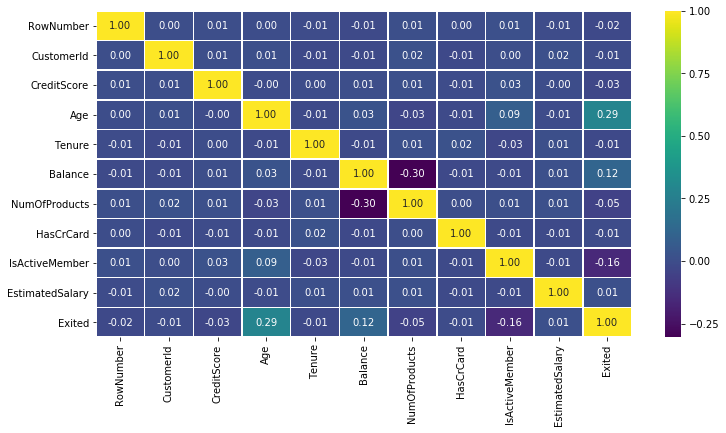

In [28]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(bank_customers_data.corr(), annot = True, fmt = ".2f", linewidths=0.5, cmap='viridis', ax=ax) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

According to the heatmap above, I have observed below findings,

- All the attributes are loosly correlated with each other.
- Age is somewhat contributing to the target variable Exited/Churned.

**2. Different plots to fetch the count of different attributes/columns against exited/churned customers**

**Fig.1** shows the count of Male and Female against the target variable Exited (0 or 1).

**Observation** - Female churned/exited more than Male.

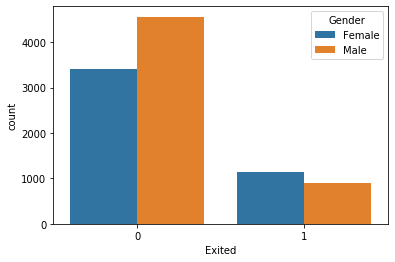

In [29]:
genderplot = sns.countplot(x='Exited', data=bank_customers_data,hue='Gender')
plt.show()

**Fig.2** shows tenure plot against the exited/churned probability.

**Observation** - In the mid tenure level there is less churn probability.

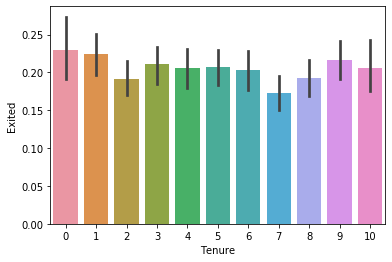

In [30]:
tenureplot = sns.barplot(x='Tenure', y='Exited', data=bank_customers_data)
plt.show()

**Fig.3** shows age plot against the exited/churned values.

**Observation** - Customers of age from 40 churned/exited more than all others.

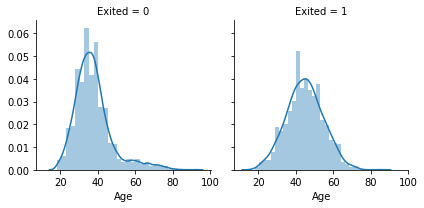

In [31]:
ageplot = sns.FacetGrid(bank_customers_data, col = "Exited")
ageplot.map(sns.distplot, "Age", bins = 30)
plt.show()

**Fig.4** shows Balance plot against the exited/churned values.

**Observation** - Customers having balance between 100,000 and 120,000 churned/exited more than others.

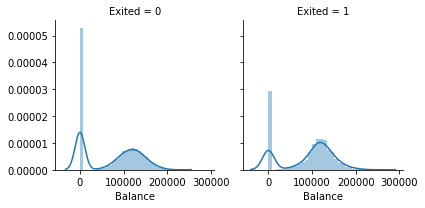

In [32]:
balanceplot = sns.FacetGrid(bank_customers_data, col = "Exited")
balanceplot.map(sns.distplot, "Balance", bins = 30)
plt.show()

**Fig.5** shows CreditScore plot against the exited/churned values.

**Observation** - Customers having Credit Score between 600 and 700 churned/exited more than others.

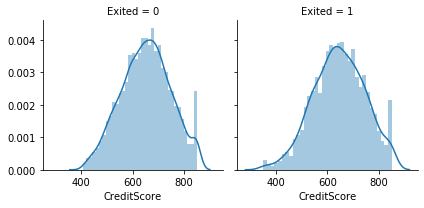

In [33]:
csplot = sns.FacetGrid(bank_customers_data, col = "Exited")
csplot.map(sns.distplot, "CreditScore", bins = 35)
plt.show()

**Fig.6** shows Estimated Salary plot against the exited/churned values.

**Observation** - Customers having higher salaries churned/exited more..

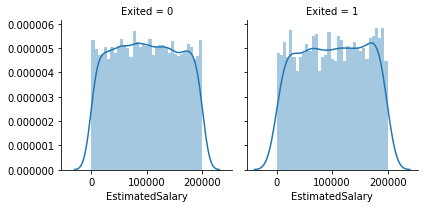

In [34]:
esplot = sns.FacetGrid(bank_customers_data, col = "Exited")
esplot.map(sns.distplot, "EstimatedSalary", bins = 35) 
plt.show()

### Data Preprocessing

**1. Remove the unecessary columns/attributes depending on the relationship against the target variable**

**NOTE**: I have removed the RowNumber, CustomerId, and Surname from the dataframe because they don't have any realtionship with the target variable "Churned/Exited"

In [35]:
bank_customers_data = bank_customers_data.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)

In [36]:
bank_customers_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**2. Convert the categorical attributes/variables such as Gender and Geography into dummy/indicator variables using get_dummies() method**

**NOTE**: Without getting dummies for categorical variables, it would be difficult to build machine learning algorithms to predict likely churn customers.

In [37]:
bank_customers_data['isMale'] = bank_customers_data['Gender'].map({'Male':1, 'Female':0})

In [38]:
bank_customers_data[['Germany','Spain']] = pd.get_dummies(bank_customers_data['Geography'], drop_first=True)

In [39]:
bank_customers_data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isMale,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [40]:
bank_customers_data = bank_customers_data.drop(columns=['Geography', 'Gender'], axis=1) ### Dropped the columns Gender and Geography

In [41]:
bank_customers_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isMale,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


**3. Rename of column Exited to Churned**

In [42]:
bank_customers_data['Churned'] = bank_customers_data['Exited']

In [43]:
bank_customers_data.drop('Exited',axis=1,inplace=True)

In [44]:
bank_customers_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,Germany,Spain,Churned
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**4. Checking the missing values in attributes**

In [45]:
pd.DataFrame(bank_customers_data.isnull().sum(), columns=['Count'])

,Count
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
isMale,0
Germany,0


**5. Use Normalization to make the values of columns/attributes of same scale using Data Preprocessing module**

**NOTE**: I performed normalization on the attributes (denormalized attributes) because we can easily fit/train any machine learning model with the data having values at same scale to predict likely churn customers.

In [55]:
bank_customers_data[['Balance','EstimatedSalary','CreditScore']] = normalize(bank_customers_data[['Balance','EstimatedSalary','CreditScore']], axis=1)

In [56]:
bank_customers_data.corr

<bound method DataFrame.corr of       CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.006108   42       2  0.000000              1          1   
1        0.004333   41       1  0.597259              1          0   
2        0.002559   42       8  0.814000              3          1   
3        0.007450   39       1  0.000000              2          0   
4        0.005730   43       2  0.846040              1          1   
...           ...  ...     ...       ...            ...        ...   
9995     0.008008   39       5  0.000000              2          1   
9996     0.004419   35      10  0.491320              1          1   
9997     0.016844   36       7  0.000000              1          0   
9998     0.006464   42       3  0.628577              2          1   
9999     0.005839   28       4  0.959522              1          1   

      IsActiveMember  EstimatedSalary  isMale  Germany  Spain  Churned  
0                  1         0.999981       0        0

## Predictive Modeling

### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

X = bank_customers_data.drop('Churned',axis=1)

y = bank_customers_data['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

In [58]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,Germany,Spain
0,0.006108,42,2,0.000000,1,1,1,0.999981,0,0,0
1,0.004333,41,1,0.597259,1,0,1,0.802037,0,0,1
2,0.002559,42,8,0.814000,3,1,0,0.580859,0,0,0
3,0.007450,39,1,0.000000,2,0,0,0.999972,0,0,0
4,0.005730,43,2,0.846040,1,1,1,0.533088,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.008008,39,5,0.000000,2,1,0,0.999968,1,0,0
9996,0.004419,35,10,0.491320,1,1,1,0.870968,1,0,0
9997,0.016844,36,7,0.000000,1,0,1,0.999858,0,0,0
9998,0.006464,42,3,0.628577,2,1,0,0.777720,1,1,0


### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
train_pred_lr = lr.predict(X_train)  # Prediction on Train dataset

In [63]:
test_pred_lr = lr.predict(X_test)  # Prediction on Test dataset

In [64]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_lr)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_lr))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_lr)) # Classification Report for Train dataset


0.813


[[5413  172]
 [1137  278]]


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5585
           1       0.62      0.20      0.30      1415

    accuracy                           0.81      7000
   macro avg       0.72      0.58      0.60      7000
weighted avg       0.78      0.81      0.77      7000



In [65]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_lr)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_lr))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_lr)) #Classification Report for Test dataset

0.8096666666666666


[[2307   71]
 [ 500  122]]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.63      0.20      0.30       622

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



#### K-fold Cross Validation technique

***NOTE: I have used K-fold cross validation technique to allow every sample in the dataset get a chance to be tested which in turn reduces the problem of overfitting.***

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
kfold = KFold(n_splits=5, random_state=7)

In [68]:
result = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.8128571428571428


#### HyperParameter Tuning Techniques
##### GridSearchCV 

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
C = [1.0,1.5,2.0,2.5]
dual=[True,False]
max_iter=[100,110,120,130,140]
param_lr = dict(dual=dual,max_iter=max_iter,C=C)

In [71]:
import time

grid = GridSearchCV(estimator=lr, param_grid=param_lr, cv = 5, n_jobs= -1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.811000 using {'C': 1.5, 'dual': False, 'max_iter': 100}
Execution time: 17.052568197250366 ms


##### RandomizedSearchCV

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_lr, cv = 10, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.811300 using {'max_iter': 140, 'dual': False, 'C': 2.0}
Execution time: 6.503728866577148 ms


#### Oversampling technique - SMOTE Analysis

In [75]:
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [76]:
smk = SMOTETomek(random_state=42)

In [77]:
X_res, y_res = smk.fit_sample(X,y)

X_res.shape,y_res.shape

((15564, 11), (15564,))

In [78]:
from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0: 7963, 1: 2037})
Resampled Dataset Shape Counter({1: 7782, 0: 7782})


In [79]:
log = LogisticRegression(dual=False, max_iter=100, C=1.5)
log.fit(X_res, y_res)
prediction_lr = log.predict(X_test)

In [80]:
print(accuracy_score(y_test,prediction_lr)) # Accuracy Score
print('\n')
print(confusion_matrix(y_test, prediction_lr)) #Confusion Matrix 
print('\n')
print(classification_report(y_test,prediction_lr)) #Classification Report 
print('\n')
print(roc_auc_score(y_test, prediction_lr)) # ROC-AUC score

0.7156666666666667


[[1708  670]
 [ 183  439]]


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2378
           1       0.40      0.71      0.51       622

    accuracy                           0.72      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.72      0.74      3000



0.7120192060663262


#### ROC Curve

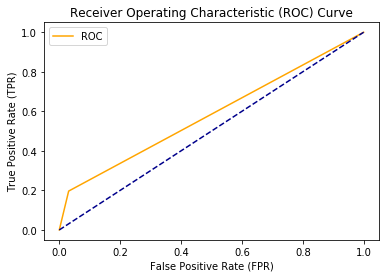



0.5828348270069691


In [81]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_lr)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_lr)) # ROC-AUC score for Train dataset

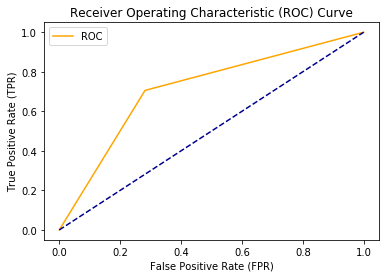



0.7120192060663262


In [82]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_lr)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_lr)) # ROC-AUC score for Train dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say it's not big  difference between Area Under Curve (AUC) of both datasets, which tells us that our Logistic Regression model is a good generalized model with improved AUC on unseen test dataset.**

### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = DecisionTreeClassifier(class_weight='balanced')

In [85]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
train_pred_dt = dtree.predict(X_train)  # Prediction on Train dataset

In [87]:
test_pred_dt = dtree.predict(X_test)  # Prediction on Test dataset

In [88]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_dt)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_dt))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_dt)) # Classification Report for Train dataset
print('\n')
print(roc_auc_score(y_train, train_pred_dt)) # ROC-AUC score for Train dataset

1.0


[[5585    0]
 [   0 1415]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5585
           1       1.00      1.00      1.00      1415

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



1.0


In [89]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_dt)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_dt))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_dt)) #Classification Report for Test dataset
print('\n')
print(roc_auc_score(y_test, test_pred_dt)) # ROC-AUC score for Test dataset

0.7806666666666666


[[2026  352]
 [ 306  316]]


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2378
           1       0.47      0.51      0.49       622

    accuracy                           0.78      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.79      0.78      0.78      3000



0.6800075180039971


#### K-fold Cross Validation Technique

***NOTE: I have used K-fold cross validation technique to allow every sample in the dataset get a chance to be tested which in turn reduces the problem of overfitting.***

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [91]:
kfold = KFold(n_splits=10, random_state=7)

In [92]:
result = cross_val_score(dtree, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.798


#### HyperParameter Tuning Techniques
##### GridSearchCV 

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_tree = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [95]:
import time

grid = GridSearchCV(estimator=dtree, param_grid=param_tree, cv = 5, n_jobs= -1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.784800 using {'max_leaf_nodes': 26, 'min_samples_split': 2}
Execution time: 18.541263103485107 ms


##### RandomizedSearchCV 

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
random = RandomizedSearchCV(estimator=dtree, param_distributions=param_tree, cv = 10, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.776400 using {'min_samples_split': 2, 'max_leaf_nodes': 31}
Execution time: 1.4055700302124023 ms


#### Oversampling technique - SMOTE Analysis

In [98]:
from imblearn.combine import SMOTETomek

In [99]:
smk = SMOTETomek(random_state=42)

In [100]:
X_res, y_res = smk.fit_sample(X,y)
X_res.shape,y_res.shape

((15564, 11), (15564,))

In [101]:
from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0: 7963, 1: 2037})
Resampled Dataset Shape Counter({1: 7782, 0: 7782})


In [102]:
dtree = DecisionTreeClassifier(max_leaf_nodes = 24, min_samples_split = 3, class_weight='balanced')
dtree.fit(X_res,y_res)
prediction_dtree = dtree.predict(X_test)

In [103]:
print(accuracy_score(y_test,prediction_dtree)) # Accuracy Score
print('\n')
print(confusion_matrix(y_test, prediction_dtree)) #Confusion Matrix 
print('\n')
print(classification_report(y_test,prediction_dtree)) #Classification Report 

0.8136666666666666


[[1984  394]
 [ 165  457]]


              precision    recall  f1-score   support

           0       0.92      0.83      0.88      2378
           1       0.54      0.73      0.62       622

    accuracy                           0.81      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.84      0.81      0.82      3000



#### ROC Curve

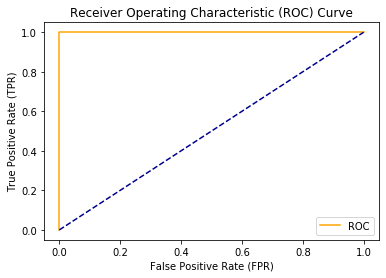



1.0


In [104]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_dt)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_dt)) # ROC-AUC score for Train dataset

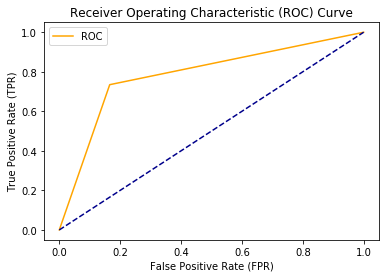



0.7845206190724731


In [105]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_dtree)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_dtree)) # ROC-AUC score for Train dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say it's not big  difference between Area Under Curve (AUC) of both datasets, which tells us that our Decision Tree model is a good generalized model with considerable AUC on unseen test dataset.**

### KNN (K-Nearest Neighbor Classifier)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier()

In [108]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
train_pred_knn = knn.predict(X_train) # Prediction on Train dataset

In [110]:
test_pred_knn = knn.predict(X_test) # Prediction on Test dataset

In [111]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_knn)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_knn))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_knn)) # Classification Report for Train dataset

0.8655714285714285


[[5377  208]
 [ 733  682]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5585
           1       0.77      0.48      0.59      1415

    accuracy                           0.87      7000
   macro avg       0.82      0.72      0.76      7000
weighted avg       0.86      0.87      0.85      7000



In [112]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_knn)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_knn))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_knn)) #Classification Report for Test dataset

0.8273333333333334


[[2236  142]
 [ 376  246]]


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2378
           1       0.63      0.40      0.49       622

    accuracy                           0.83      3000
   macro avg       0.75      0.67      0.69      3000
weighted avg       0.81      0.83      0.81      3000



#### K-fold Cross Validation Technique

***NOTE: I have used K-fold cross validation technique to allow every sample in the dataset get a chance to be tested which in turn reduces the problem of overfitting.***

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [114]:
kfold = KFold(n_splits=10, random_state=7)

In [115]:
result = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8263


#### HyperParameter Tuning Technique
##### Elbow Method to select best K value

In [116]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

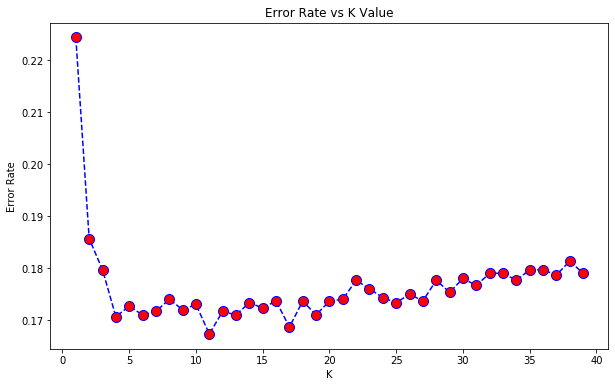

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Accuracy rate with minimal error rate and effienct value of K

In [118]:
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [119]:
print(accuracy_score(y_test, pred_knn))
print('\n')
print(confusion_matrix(y_test, pred_knn))
print('\n')
print(classification_report(y_test, pred_knn))

0.8246666666666667


[[2261  117]
 [ 409  213]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2378
           1       0.65      0.34      0.45       622

    accuracy                           0.82      3000
   macro avg       0.75      0.65      0.67      3000
weighted avg       0.81      0.82      0.80      3000



#### Oversampling Technique - SMOTE Analysis

In [120]:
from imblearn.combine import SMOTETomek

In [121]:
smk = SMOTETomek(random_state=42)

In [122]:
X_res, y_res = smk.fit_sample(X,y)
X_res.shape,y_res.shape

from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0: 7963, 1: 2037})
Resampled Dataset Shape Counter({1: 7782, 0: 7782})


In [123]:
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn.fit(X_res,y_res)
prediction_knn = knn.predict(X_test)

In [124]:
print(accuracy_score(y_test, prediction_knn))
print('\n')
print(confusion_matrix(y_test, prediction_knn))
print('\n')
print(classification_report(y_test, prediction_knn))

0.9836666666666667


[[2342   36]
 [  13  609]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2378
           1       0.94      0.98      0.96       622

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



#### ROC Curve

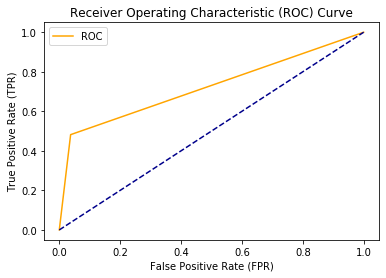



0.7223680922207706


In [125]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_knn)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_knn)) # ROC-AUC score for Train dataset

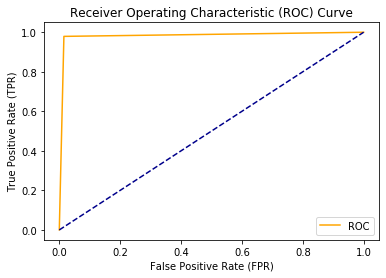



0.9819804531896078


In [126]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_knn)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_knn)) # ROC-AUC score for test dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say it's not big  difference between Area Under Curve (AUC) of both datasets, which tells us that our KNN model is a good generalized model with improved AUC on unseen test dataset.**

### Support Vector Machine - Support Vector Classifier (SVC)

In [127]:
from sklearn.svm import SVC

In [128]:
svc = SVC()

In [129]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
train_pred_svc = svc.predict(X_train)

In [131]:
test_pred_svc = svc.predict(X_test)

In [132]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_svc)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_svc))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_svc)) # Classification Report for Train dataset
print('\n')
print(roc_auc_score(y_train, train_pred_svc)) # ROC-AUC score for Train dataset

0.8532857142857143


[[5478  107]
 [ 920  495]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      5585
           1       0.82      0.35      0.49      1415

    accuracy                           0.85      7000
   macro avg       0.84      0.67      0.70      7000
weighted avg       0.85      0.85      0.83      7000



0.6653324306968121


In [133]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_svc)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_svc))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_svc)) #Classification Report for Test dataset
print('\n')
print(roc_auc_score(y_test,test_pred_svc)) # ROC-AUC score for Test dataset

0.845


[[2326   52]
 [ 413  209]]


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2378
           1       0.80      0.34      0.47       622

    accuracy                           0.84      3000
   macro avg       0.82      0.66      0.69      3000
weighted avg       0.84      0.84      0.82      3000



0.6570728732567291


#### K-fold Cross Validation Technique

***NOTE: I have used K-fold cross validation technique to allow every sample in the dataset get a chance to be tested which in turn reduces the problem of overfitting.***

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [135]:
kfold = KFold(n_splits=10, random_state=7)

In [136]:
result = cross_val_score(svc, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8450999999999999


#### HyperParameter Tuning Technique
##### GridSearchCV

In [345]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_svc = {'C':[0.5, 1, 10, 50, 100], 'max_iter':[100,200,300,400]}

In [138]:
import time

grid = GridSearchCV(estimator=svc, param_grid=param_svc, cv = 5, n_jobs= -1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.733900 using {'C': 0.5, 'max_iter': 100}
Execution time: 9.417261123657227 ms


##### RandomizedSearchCV

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
random = RandomizedSearchCV(estimator=svc, param_distributions=param_svc, cv = 10, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.729900 using {'max_iter': 200, 'C': 1}
Execution time: 7.7674901485443115 ms


#### Oversampling Technique - SMOTE Analysis

In [141]:
from imblearn.combine import SMOTETomek

In [142]:
smk = SMOTETomek(random_state=42)

In [143]:
X_res, y_res = smk.fit_sample(X,y)
X_res.shape,y_res.shape

((15564, 11), (15564,))

In [144]:
from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0: 7963, 1: 2037})
Resampled Dataset Shape Counter({1: 7782, 0: 7782})


In [145]:
svc = SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)
svc.fit(X_res,y_res)
prediction_svc = svc.predict(X_test)

[LibSVM]

In [146]:
print(accuracy_score(y_test, prediction_svc))
print('\n')
print(confusion_matrix(y_test, prediction_svc))
print('\n')
print(classification_report(y_test, prediction_svc))

0.8173333333333334


[[1970  408]
 [ 140  482]]


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2378
           1       0.54      0.77      0.64       622

    accuracy                           0.82      3000
   macro avg       0.74      0.80      0.76      3000
weighted avg       0.85      0.82      0.83      3000



#### ROC Curve

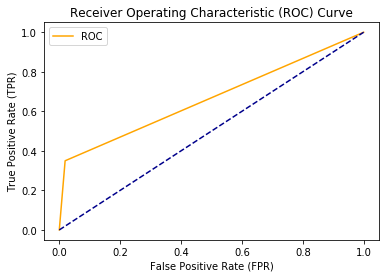



0.6653324306968121


In [147]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_svc)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_svc)) # ROC-AUC score for Train dataset

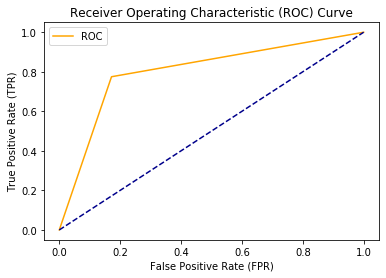



0.8016734319688247


In [148]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_svc)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_svc)) # ROC-AUC score for Train dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say it's not big  difference between Area Under Curve (AUC) of both datasets, which tells us that our SVM model is a good generalized model with excellent improved AUC on unseen test dataset.**

### Random Forest Classifier

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf = RandomForestClassifier()

In [151]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
train_pred_rf = rf.predict(X_train)

In [153]:
test_pred_rf = rf.predict(X_test)

In [154]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_rf)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_rf))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_rf)) # Classification Report for Train dataset
print('\n')
print(roc_auc_score(y_train, train_pred_rf)) # ROC-AUC score for Train dataset

0.9807142857142858


[[5578    7]
 [ 128 1287]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5585
           1       0.99      0.91      0.95      1415

    accuracy                           0.98      7000
   macro avg       0.99      0.95      0.97      7000
weighted avg       0.98      0.98      0.98      7000



0.9541436394177994


In [155]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_rf)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_rf))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_rf)) #Classification Report for Test dataset
print('\n')
print(roc_auc_score(y_test,test_pred_rf)) # ROC-AUC score for Test dataset

0.8516666666666667


[[2267  111]
 [ 334  288]]


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2378
           1       0.72      0.46      0.56       622

    accuracy                           0.85      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



0.7081723137333381


#### K-fold Cross Validation Technique

***NOTE: I have used K-fold cross validation technique to allow every sample in the dataset get a chance to be tested which in turn reduces the problem of overfitting.***

In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [157]:
kfold = KFold(n_splits=10, random_state=7)

In [158]:
result = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8516000000000001


#### HyperParameter Tuning Technique

##### RandomizedSearchCV

In [170]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
n_estimators = [200,400,600]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,12,30,50]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [166]:
para_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [169]:
random = RandomizedSearchCV(estimator=rf, param_distributions=para_grid_rf, cv = 3, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.861600 using {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Execution time: 65.13546395301819 ms


#### Oversampling Technique - SMOTE Analysis

In [392]:
from imblearn.combine import SMOTETomek

In [393]:
smk = SMOTETomek(random_state=42)

In [394]:
X_res, y_res = smk.fit_sample(X,y)
X_res.shape,y_res.shape

((15564, 11), (15564,))

In [395]:
from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0: 7963, 1: 2037})
Resampled Dataset Shape Counter({1: 7782, 0: 7782})


In [396]:
rfc = RandomForestClassifier(n_estimators=1500,min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=12, bootstrap=True)
rfc.fit(X_res,y_res)
prediction_rfc = rfc.predict(X_test)

In [397]:
print(accuracy_score(y_test, prediction_rfc))
print('\n')
print(confusion_matrix(y_test, prediction_rfc))
print('\n')
print(classification_report(y_test, prediction_rfc))

0.8973333333333333


[[2234  144]
 [ 164  458]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2378
           1       0.76      0.74      0.75       622

    accuracy                           0.90      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.90      0.90      0.90      3000



#### ROC Curve

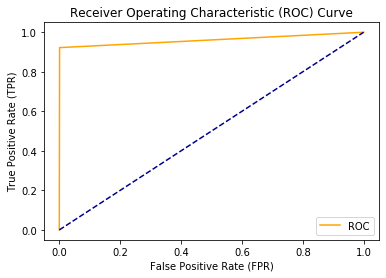



0.9606831144756114


In [413]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_rf)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_rf)) # ROC-AUC score for Train dataset

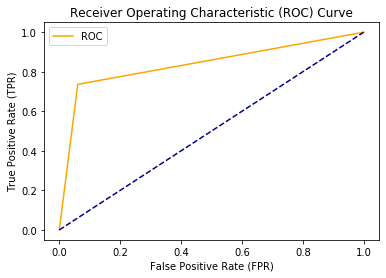



0.8378896584175953


In [415]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_rfc)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_rfc)) # ROC-AUC score for Train dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say it's not big  difference between Area Under Curve (AUC) of both datasets, which tells us that our Randon Forest model is a best generalized model with excellent AUC of 0.83 on unseen test dataset.**

### Comparison of Predictive Model's Metrics

In [416]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)

X_res, y_res = smk.fit_sample(X,y)

X_res.shape,y_res.shape

from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0: 7963, 1: 2037})
Resampled Dataset Shape Counter({1: 7782, 0: 7782})


In [455]:
# Creating objects of different ML algorithms with various combinations of HyperParameters

algorithms_wp = [
    linear_model.LogisticRegression(dual=False, max_iter=100, C=1.5),
    neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance'),
    tree.DecisionTreeClassifier(max_leaf_nodes = 24, min_samples_split = 3, class_weight='balanced'),
    ensemble.RandomForestClassifier(n_estimators=1500,min_samples_split=2, 
                                    min_samples_leaf=2, max_features='auto', max_depth=12, bootstrap=True),
    svm.SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)]

In [472]:
# Training and Testing models with training dataset

model_columns = []
train_model_compare = pd.DataFrame(columns = model_columns)

row_index = 0
for alg in algorithms_wp:
    predicted = alg.fit(X_train,y_train).predict(X_train)
    fp, tp, th = roc_curve(y_train, predicted)
    model_name = alg.__class__.__name__
    train_model_compare.loc[row_index,'MLA Name'] = model_name
    train_model_compare.loc[row_index, 'MLA Accuracy'] = round(accuracy_score(y_train,predicted), 4)
    #MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(log.score(X_test, y_test), 4)
    train_model_compare.loc[row_index, 'MLA Precision'] = precision_score(y_train, predicted)
    train_model_compare.loc[row_index, 'MLA Recall'] = recall_score(y_train, predicted)
    train_model_compare.loc[row_index, 'MLA F-1 Score'] = f1_score(y_train,predicted)
    train_model_compare.loc[row_index, 'MLA AUC'] = roc_auc_score(y_train,predicted)

    row_index+=1
    
train_model_compare.sort_values(by = ['MLA Accuracy'], ascending = False, inplace = True)    
train_model_compare

[LibSVM]

,MLA Name,MLA Accuracy,MLA Precision,MLA Recall,MLA F-1 Score,MLA AUC
1,KNeighborsClassifier,1.0000,1.000000,1.000000,1.000000,1.000000
3,RandomForestClassifier,0.9153,0.955654,0.609187,0.744066,0.801013
0,LogisticRegression,0.8133,0.619469,0.197880,0.299946,0.583542
4,SVC,0.7884,0.484680,0.737809,0.585038,0.769531
2,DecisionTreeClassifier,0.7677,0.456886,0.790106,0.578975,0.776074


In [473]:
# Training and Testing models with testing dataset

model_columns = []
test_model_compare = pd.DataFrame(columns = model_columns)

row_index = 0
for alg in algorithms_wp:
    predicted = alg.fit(X_res,y_res).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    model_name = alg.__class__.__name__
    test_model_compare.loc[row_index,'MLA Name'] = model_name
    test_model_compare.loc[row_index, 'MLA Accuracy'] = round(accuracy_score(y_test,predicted), 4)
    #MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(log.score(X_test, y_test), 4)
    test_model_compare.loc[row_index, 'MLA Precision'] = precision_score(y_test, predicted)
    test_model_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    test_model_compare.loc[row_index, 'MLA F-1 Score'] = f1_score(y_test,predicted)
    test_model_compare.loc[row_index, 'MLA AUC'] = roc_auc_score(y_test,predicted)
    
    row_index+=1
    
test_model_compare.sort_values(by = ['MLA Accuracy'], ascending = False, inplace = True)    
test_model_compare

[LibSVM]

,MLA Name,MLA Accuracy,MLA Precision,MLA Recall,MLA F-1 Score,MLA AUC
1,KNeighborsClassifier,0.9837,0.944186,0.979100,0.961326,0.981980
3,RandomForestClassifier,0.8967,0.760870,0.731511,0.745902,0.835688
4,SVC,0.8173,0.541573,0.774920,0.637566,0.801673
2,DecisionTreeClassifier,0.8137,0.537015,0.734727,0.620502,0.784521
0,LogisticRegression,0.7157,0.395852,0.705788,0.507221,0.712019


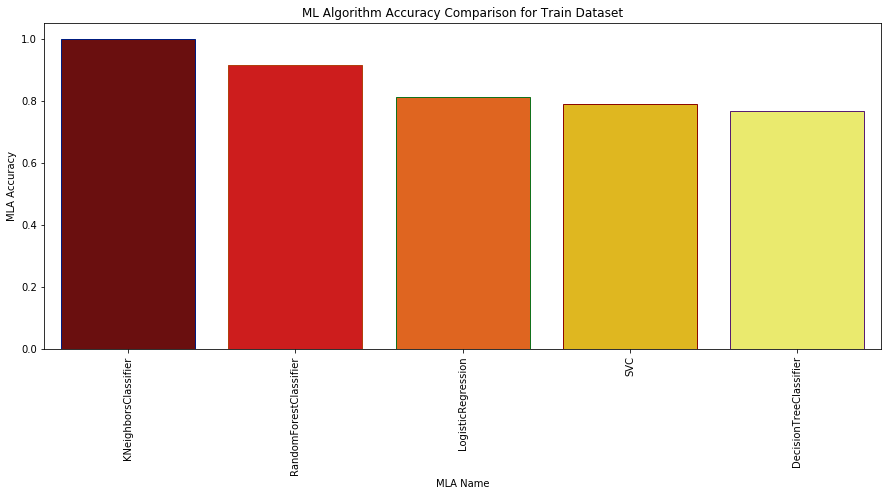

In [474]:
# Accuracy Comparison for Training Dataset

plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Accuracy",data=train_model_compare,palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Algorithm Accuracy Comparison for Train Dataset')
plt.show()

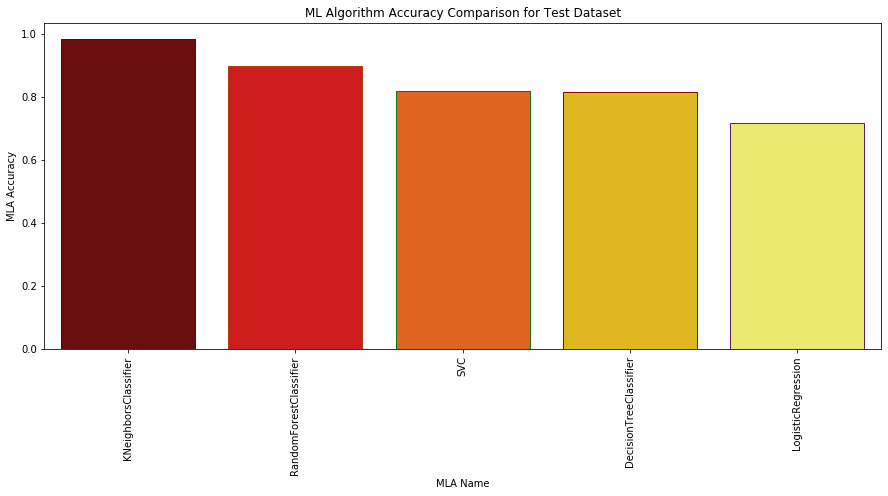

In [475]:
# Accuracy Comparison for Test Dataset

plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Accuracy",data=test_model_compare,palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Algorithm Accuracy Comparison for Test Dataset')
plt.show()

### <center> ** The End ** </center>